# Project : ONLINE RETAIL

### Problem Description:
### An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

### Useful insights about the customer purchasing history that can be an added advantage for the online retailer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import KMeans,AgglomerativeClustering
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ord = pd.read_csv(r"C:\Users\tharu\Downloads\OnlineRetail.csv",encoding='ISO-8859-1')

In [3]:
ord

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [4]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
ord.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
ord.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [7]:
ord.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
cols = list(ord.columns)
cols

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [9]:
ord[ord['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12-01-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12-01-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12-01-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12-01-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12-01-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12-09-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12-09-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12-09-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12-09-2011 10:26,10.79,NaN,United Kingdom


In [10]:
ord[ord['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12-01-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12-01-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12-01-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12-01-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12-01-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12-07-2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12-07-2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12-07-2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12-08-2011 10:33,0.0,NaN,United Kingdom


In [11]:
ord = ord.dropna()

In [12]:
ord.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
ord.shape

(406829, 8)

In [14]:
len(ord[ord.duplicated()])

5225

In [15]:
ord.drop_duplicates(inplace = True)

In [16]:
ord.shape

(401604, 8)

In [17]:
df = ord.copy()

In [18]:
df.shape

(401604, 8)

In [19]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [21]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
InvoiceDate,401604,20460,11/14/2011 15:27,543
Country,401604,37,United Kingdom,356728


In [22]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [23]:
Cancel_orders = df[df['InvoiceNo'].str.startswith('C')]

In [24]:
Cancel_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom


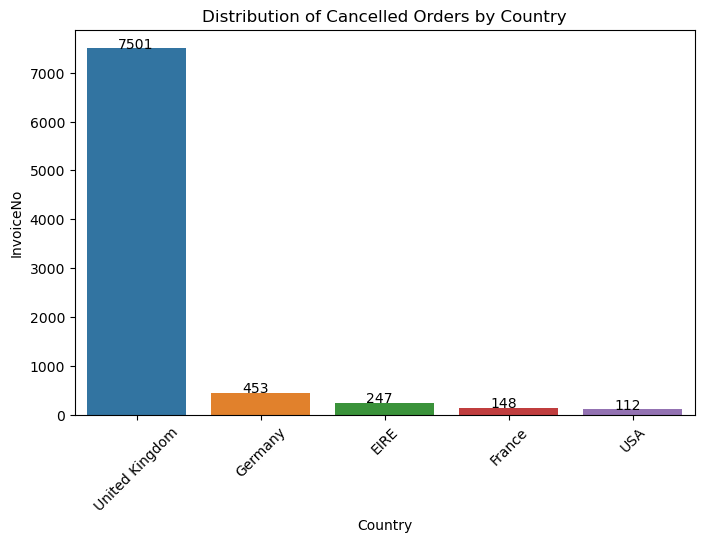

In [25]:
# Compute the number of canceled orders per country
Countr_cancel = Cancel_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the DataFrame by the count of canceled orders in descending order
Countr_cancel = Countr_cancel.sort_values('InvoiceNo', ascending=False, ignore_index=True)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=Countr_cancel['Country'][:5], y=Countr_cancel['InvoiceNo'][:5])

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

plt.xticks(rotation=45)

plt.title('Distribution of Cancelled Orders by Country')

plt.show()

In [26]:
df = df[~df['InvoiceNo'].str.startswith('C')]

In [27]:
df.shape

(392732, 8)

In [28]:
df['Amount'] = df.Quantity*df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [29]:
ca = df.groupby('CustomerID')['Amount'].sum().reset_index()
ca.head(5)

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


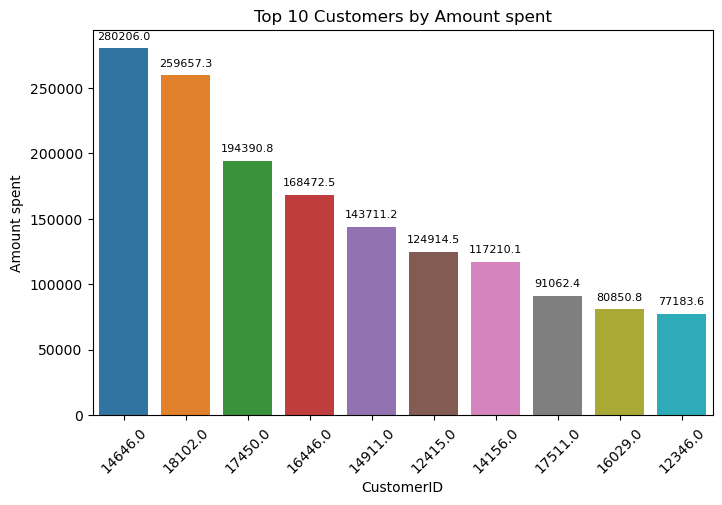

In [30]:
# Sort the DataFrame by 'Amount' column in descending order
ca = ca.sort_values('Amount', ascending=False, ignore_index=True)

# Plotting
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=ca['CustomerID'][:10], y=ca['Amount'][:10], order=ca['CustomerID'][:10])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Amount spent')
plt.xlabel('CustomerID')
plt.ylabel('Amount spent')
plt.show()

In [31]:
product_df = df['Description'].value_counts().reset_index()
product_df.head(5)

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


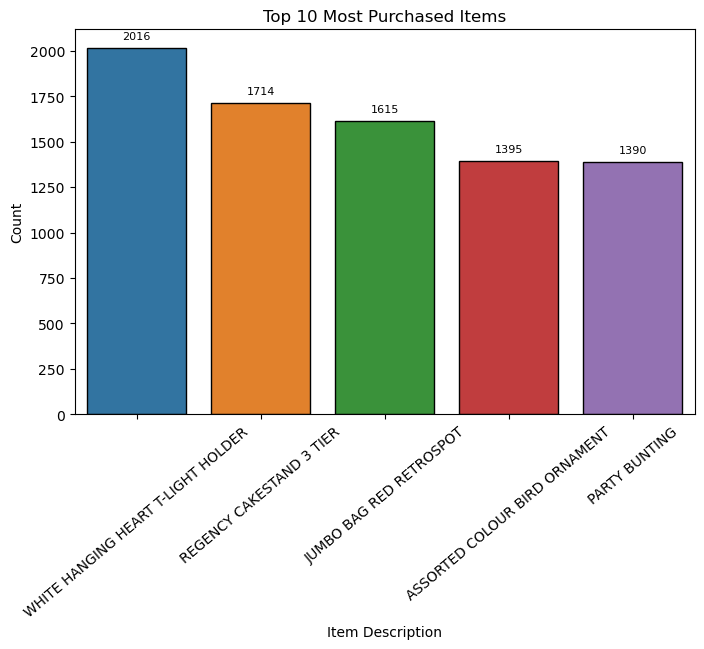

In [32]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Description', y='count', data=product_df[:5], edgecolor='black')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=40)
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.show()

In [33]:
df["InvoiceDate"] = df["InvoiceDate"].apply(lambda x: pd.to_datetime(x))

In [34]:
df['Day'] = df['InvoiceDate'].dt.day_name()        
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)
df['Month']=df['InvoiceDate'].dt.month_name()  # Creating new feature Month which gives the month like january, february, etc.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Day,year,month_num,day_num,hour,minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December


In [35]:
day_df = df['Day'].value_counts().reset_index()
day_df

,Day,count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


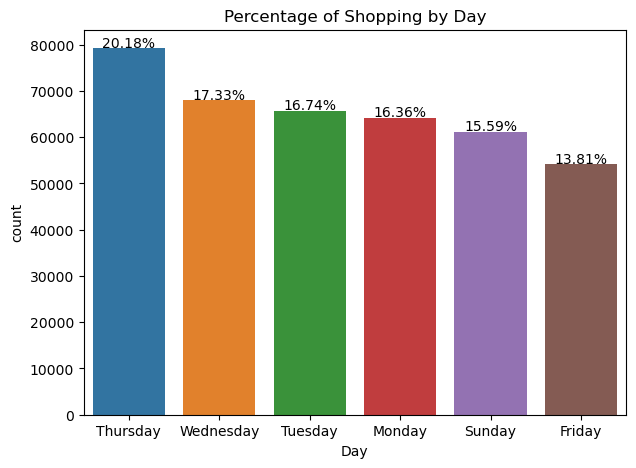

In [36]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.title('Percentage of Shopping by Day')

# Plotting the barplot
sns.barplot(x='Day', y='count', data=day_df, ax=ax)

# Adding percentage labels to each bar
total_shopping = day_df['count'].sum()
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, '{:.2f}%'.format((height / total_shopping) * 100), ha="center")

plt.show()

In [37]:
month_df = df['Month'].value_counts().reset_index()
month_df

,Month,count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


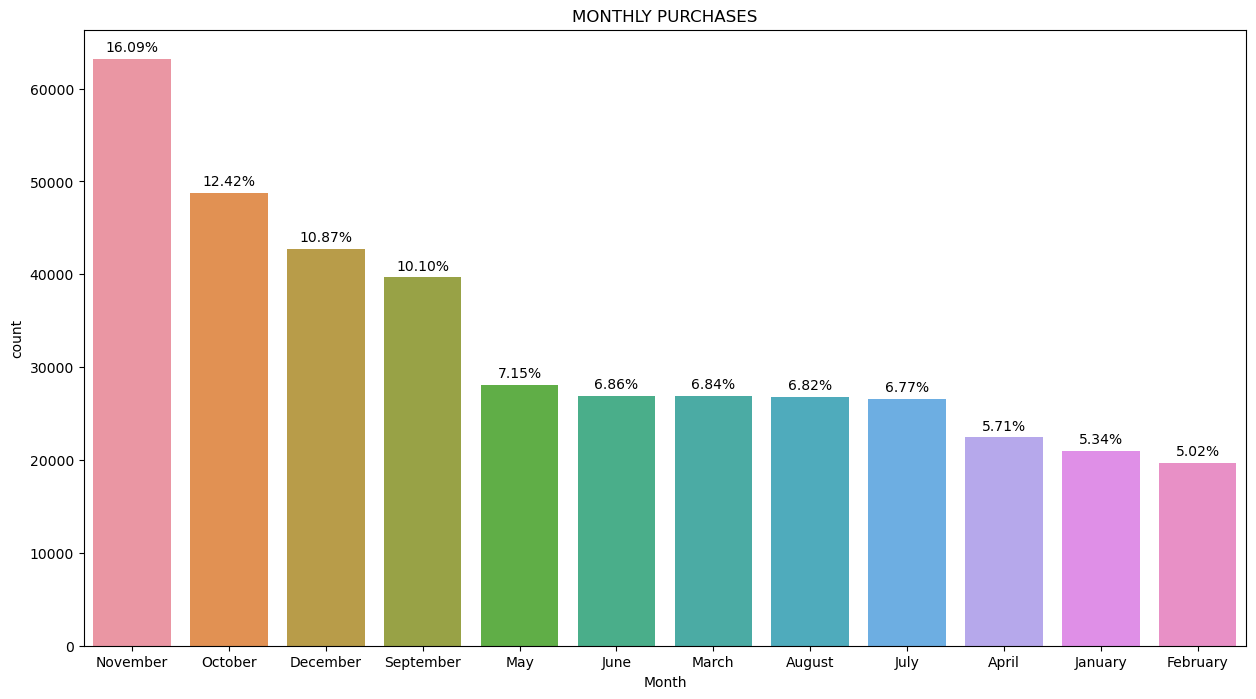

In [38]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='Month',y='count',data = month_df)
plt.title('MONTHLY PURCHASES')
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

In [39]:
df = df[~df['InvoiceNo'].str.startswith('C')]

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Day,year,month_num,day_num,hour,minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December


In [41]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount', 'Day', 'year',
       'month_num', 'day_num', 'hour', 'minute', 'Month'],
      dtype='object')

### Segment the customers based on their purchasing behavior.

In [42]:
df = df.drop(['Amount', 'Day', 'year', 'month_num', 'day_num', 'hour', 'minute', 'Month'], axis=1)

In [43]:
df['TotalAmount'] = df['UnitPrice']*df['Quantity']

In [44]:
df_cust =df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x: (df["InvoiceDate"].max() - x.max()).days,
                                      "InvoiceNo": "count",
                                      "TotalAmount": "sum"})

In [45]:
df_cust.rename(columns={"InvoiceDate": "Recency",
                    "InvoiceNo": "Frequency",
                    "TotalAmount": "MonetaryValue"}, inplace=True)

In [46]:
df_cust

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cust_scale = scaler.fit_transform(df_cust)

In [48]:
def silhouette_func(k):
    silhouette_scores = []
    for i in range(2, 10):
        kmeans = KMeans(n_clusters=i)
        labels = kmeans.fit_predict(k)
        silhouette_scores.append(silhouette_score(k, labels))
    plt.plot(range(2, 10), silhouette_scores)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()    

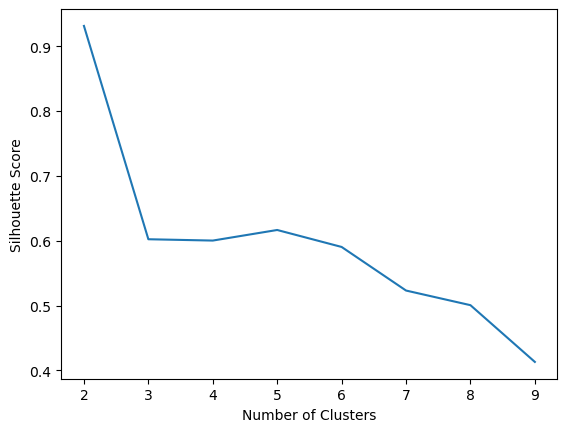

In [49]:
silhouette_func(df_cust_scale)

In [50]:
def elbow_func(k):
    elb =[]
    for i in range(2,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(k)
        elb.append(kmeans.inertia_)
    plt.plot(range(2, 10), elb)
    plt.xlabel("Number of Clusters")
    plt.ylabel("inertia")
    plt.show()

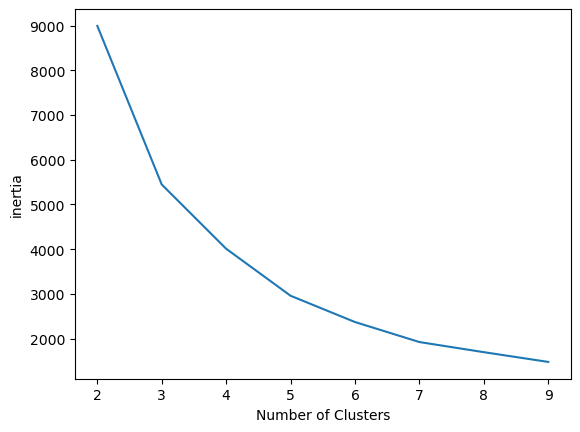

In [51]:
elbow_func(df_cust_scale)

In [52]:
model1 = KMeans(n_clusters=5)
model1.fit(df_cust_scale)

KMeans(n_clusters=5)

In [53]:
model1.inertia_

2960.520811387517

In [54]:
df_cust['Cluster'] = model1.predict(df_cust)

In [55]:
df_cust.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,3
12347.0,1,182,4310.00,3
12348.0,74,31,1797.24,3
12349.0,18,73,1757.55,3
12350.0,309,17,334.40,3


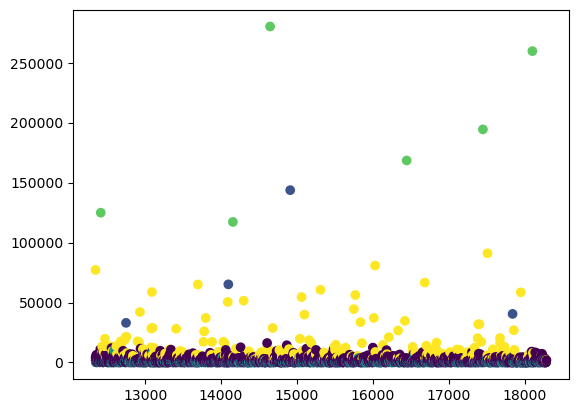

In [56]:
plt.scatter(x=df_cust.index, y=df_cust['MonetaryValue'], c=model1.labels_)
plt.show()

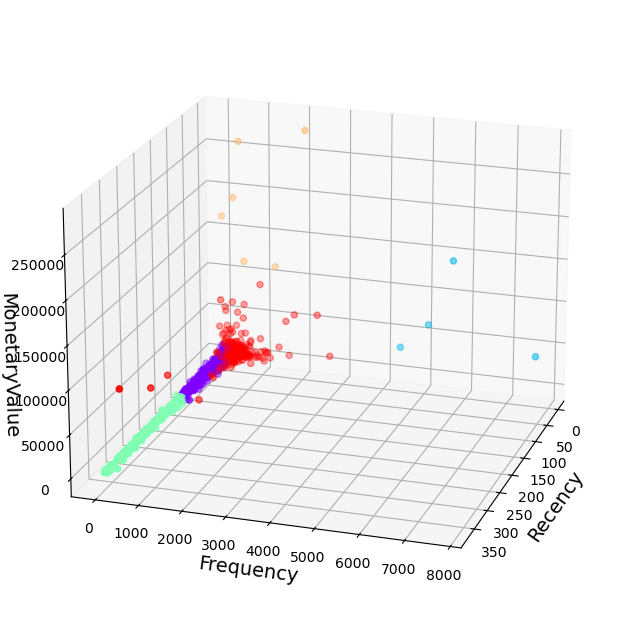

In [57]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cust['Recency'], df_cust['Frequency'], df_cust['MonetaryValue'], c=model1.labels_,cmap='rainbow')
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
ax.set_zlabel('MonetaryValue', fontsize=14)
ax.view_init(20,18)
plt.show()

In [58]:
silhouette_score(df_cust_scale, model1.labels_)

0.6171343808157355

In [59]:
calinski_harabasz_score(df_cust_scale, model1.labels_)

3680.4994442024836

In [60]:
davies_bouldin_score(df_cust_scale, model1.labels_)

0.7024959933601427

In [61]:
df_cust=df_cust.drop(['Cluster'],axis=1)

In [62]:
df_cust.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram

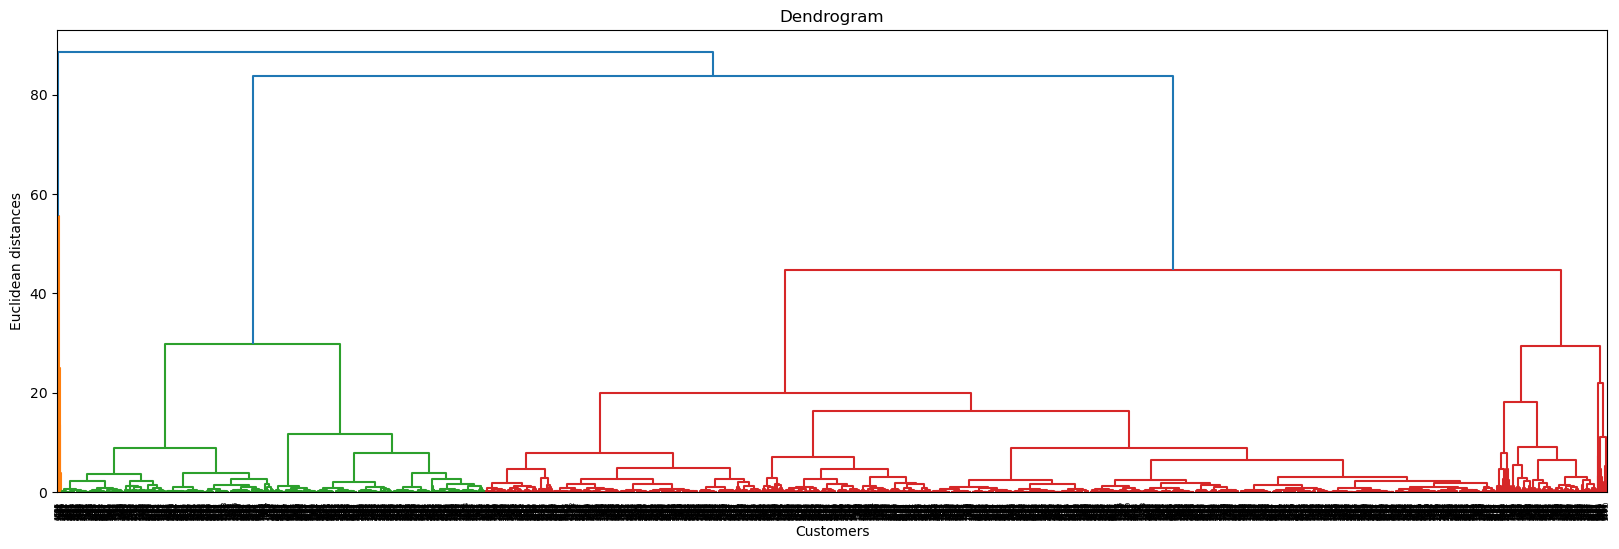

In [64]:
linkage_matrix = linkage(df_cust_scale, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(20,6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [65]:
model2 = AgglomerativeClustering(n_clusters=4)
model2.fit(df_cust_scale)

AgglomerativeClustering(n_clusters=4)

In [66]:
df_cust['Clusters'] = model2.labels_

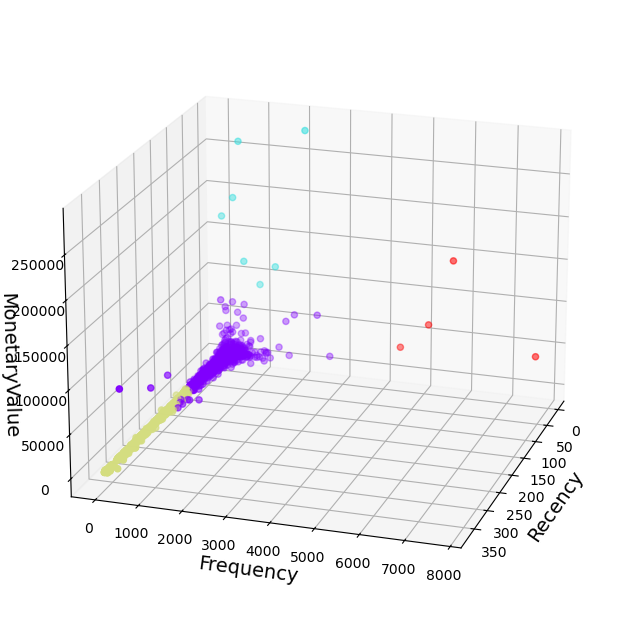

In [67]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cust['Recency'], df_cust['Frequency'], df_cust['MonetaryValue'], c=model2.labels_,cmap='rainbow')
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
ax.set_zlabel('MonetaryValue', fontsize=14)
ax.view_init(20,18)
plt.show()

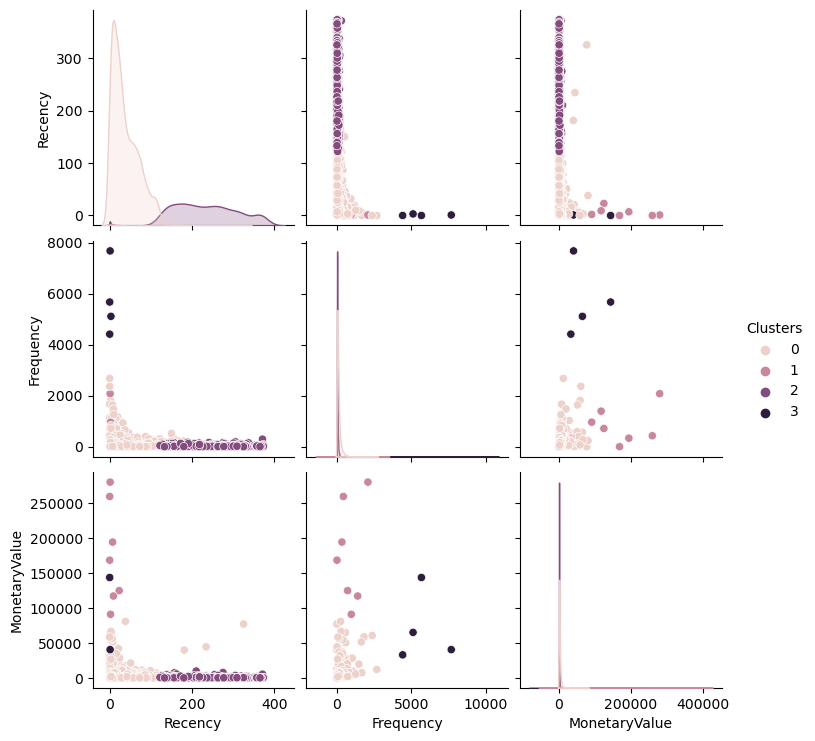

In [68]:
sns.pairplot(df_cust, hue='Clusters')
plt.show()

In [69]:
silhouette_score(df_cust_scale, model2.labels_)

0.5877105347138138

In [70]:
calinski_harabasz_score(df_cust_scale, model2.labels_)

3210.499416895213

In [71]:
davies_bouldin_score(df_cust_scale, model2.labels_)

0.5953881162297627